# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


In [3]:
cities

['keflavik',
 'margaret river',
 'kingston',
 'vadso',
 'port elizabeth',
 'bredasdorp',
 'puerto ayora',
 'argo',
 'port-aux-francais',
 'tosontsengel',
 'san andres',
 'port mathurin',
 'vredendal',
 'talnakh',
 'ash shamiyah',
 'puerto natales',
 'mount pearl',
 'klyuchi',
 'iqaluit',
 'west island',
 'ribeira grande',
 'huambo',
 'kuqa',
 'zatec',
 'adamstown',
 'selfoss',
 'afaahiti',
 'bonga',
 'karratha',
 'harstad',
 'kailua-kona',
 'sumberpucung',
 'beloyarskiy',
 'enewetak',
 'blackmans bay',
 'queenstown',
 'new norfolk',
 'tura',
 'hede',
 'albany',
 'dalandzadgad',
 'hawaiian paradise park',
 'la passe',
 'kupang',
 'avarua',
 'waitangi',
 'gusinoozyorsk',
 'cambria',
 'khandyga',
 'orkney',
 'sibolga',
 'loango',
 'swakopmund',
 'olonkinbyen',
 'gbadolite',
 'whitehorse',
 'moncton',
 'ingleby greenhow',
 'punta arenas',
 'fort bragg',
 'decorah',
 "nar'yan-mar",
 'ballina',
 'dogondoutchi',
 'vorgashor',
 'grytviken',
 'sona',
 'jamestown',
 'isafjordur',
 'invercargill'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | keflavik
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | kingston
Processing Record 4 of Set 1 | vadso
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | argo
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | tosontsengel
Processing Record 11 of Set 1 | san andres
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | vredendal
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | ash shamiyah
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | mount pearl
Processing Record 18 of Set 1 | klyuchi
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | huamb

Processing Record 42 of Set 4 | archangelos
Processing Record 43 of Set 4 | gobabis
Processing Record 44 of Set 4 | ghazni
Processing Record 45 of Set 4 | coro
Processing Record 46 of Set 4 | paita
Processing Record 47 of Set 4 | howard springs
Processing Record 48 of Set 4 | tshabong
Processing Record 49 of Set 4 | taseyevo
Processing Record 0 of Set 5 | cidade velha
Processing Record 1 of Set 5 | olgii
City not found. Skipping...
Processing Record 2 of Set 5 | taiynsha
Processing Record 3 of Set 5 | tadine
Processing Record 4 of Set 5 | manpur
Processing Record 5 of Set 5 | pico truncado
Processing Record 6 of Set 5 | iskateley
Processing Record 7 of Set 5 | marondera
Processing Record 8 of Set 5 | takoradi
Processing Record 9 of Set 5 | ancud
Processing Record 10 of Set 5 | igarka
Processing Record 11 of Set 5 | peterhead
Processing Record 12 of Set 5 | ocean city
Processing Record 13 of Set 5 | longyearbyen
Processing Record 14 of Set 5 | wynyard
Processing Record 15 of Set 5 | zyc

Processing Record 34 of Set 8 | kasongo-lunda
Processing Record 35 of Set 8 | manakara
Processing Record 36 of Set 8 | belyy yar
Processing Record 37 of Set 8 | koryazhma
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | mugia
Processing Record 40 of Set 8 | alotau
City not found. Skipping...
Processing Record 41 of Set 8 | kandi
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | chonchi
Processing Record 44 of Set 8 | naantali
Processing Record 45 of Set 8 | nea kallikrateia
Processing Record 46 of Set 8 | tomatlan
Processing Record 47 of Set 8 | saurimo
Processing Record 48 of Set 8 | mezzouna
Processing Record 49 of Set 8 | manokwari
Processing Record 0 of Set 9 | mili
Processing Record 1 of Set 9 | neustrelitz
Processing Record 2 of Set 9 | darwin
Processing Record 3 of Set 9 | tralee
Processing Record 4 of Set 9 | uaboe
City not found. Skipping...
Processing Record 5 of Set 9 | huedin
Processing Record 6 of Set 9 | kuanda
Processi

Processing Record 22 of Set 12 | leua
Processing Record 23 of Set 12 | kolokani
Processing Record 24 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 25 of Set 12 | naracoorte
Processing Record 26 of Set 12 | greymouth
Processing Record 27 of Set 12 | tazacorte
Processing Record 28 of Set 12 | dzhankoy
Processing Record 29 of Set 12 | arnprior
Processing Record 30 of Set 12 | banda aceh
Processing Record 31 of Set 12 | sur
Processing Record 32 of Set 12 | sao jose da coroa grande
Processing Record 33 of Set 12 | bahir dar
Processing Record 34 of Set 12 | ippy
Processing Record 35 of Set 12 | umea
Processing Record 36 of Set 12 | minusinsk
Processing Record 37 of Set 12 | bandundu
Processing Record 38 of Set 12 | saint-pierre
Processing Record 39 of Set 12 | yarrawonga
Processing Record 40 of Set 12 | suleja
Processing Record 41 of Set 12 | tobelo
Processing Record 42 of Set 12 | riohacha
Processing Record 43 of Set 12 | montclair
Processing Record 44 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          614
Lat           614
Lng           614
Max Temp      614
Humidity      614
Cloudiness    614
Wind Speed    614
Country       614
Date          614
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,keflavik,64.0049,-22.5624,5.24,87,100,11.32,IS,1684015827
1,margaret river,-33.9500,115.0667,15.10,71,88,3.12,AU,1684015818
2,kingston,17.9970,-76.7936,29.53,70,40,9.26,JM,1684015639
3,vadso,70.0744,29.7487,8.49,75,75,2.06,NO,1684015861
4,port elizabeth,-33.9180,25.5701,16.16,97,100,7.72,ZA,1684015937


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,5.24,87,100,11.32,IS,1684015827
1,margaret river,-33.9500,115.0667,15.10,71,88,3.12,AU,1684015818
2,kingston,17.9970,-76.7936,29.53,70,40,9.26,JM,1684015639
3,vadso,70.0744,29.7487,8.49,75,75,2.06,NO,1684015861
4,port elizabeth,-33.9180,25.5701,16.16,97,100,7.72,ZA,1684015937


In [9]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

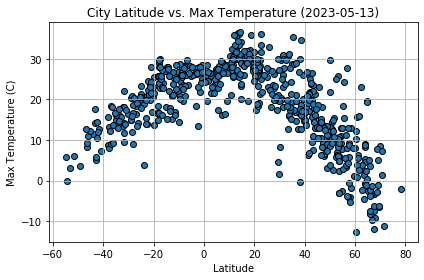

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

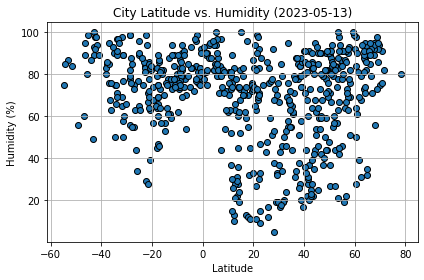

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Cloudiness

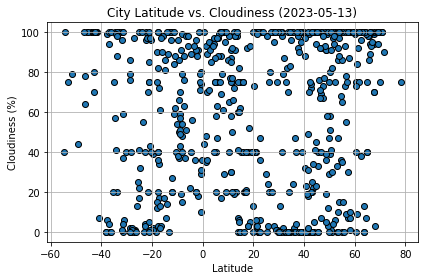

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

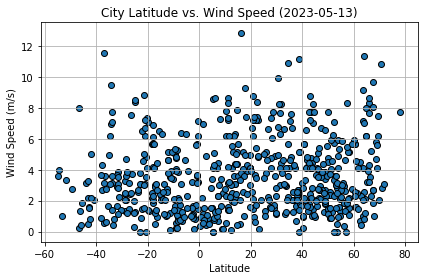

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.tight_layout()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots

def linear_regression(x_values,y_values,x_label,y_label,c_x,c_y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(c_x,c_y),fontsize=15,color="red")

    print(f"The r-value is: {rvalue**2}")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,5.24,87,100,11.32,IS,1684015827
2,kingston,17.9970,-76.7936,29.53,70,40,9.26,JM,1684015639
3,vadso,70.0744,29.7487,8.49,75,75,2.06,NO,1684015861
7,argo,37.6333,22.7333,16.55,85,98,0.68,GR,1684016139
9,tosontsengel,48.7567,98.2839,3.09,78,91,2.68,MN,1684016139


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,margaret river,-33.9500,115.0667,15.10,71,88,3.12,AU,1684015818
4,port elizabeth,-33.9180,25.5701,16.16,97,100,7.72,ZA,1684015937
5,bredasdorp,-34.5322,20.0403,13.98,75,57,6.21,ZA,1684015864
6,puerto ayora,-0.7393,-90.3518,27.98,92,74,3.58,EC,1684015832
8,port-aux-francais,-49.3500,70.2167,3.51,56,44,2.75,TF,1684015799


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6532556671963945


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

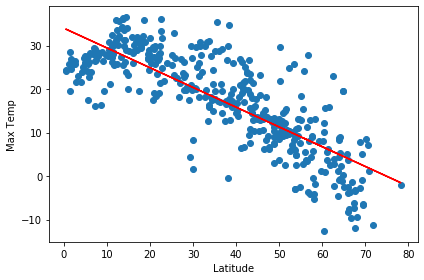

In [20]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp",10,-20)
plt.savefig("output_data/linreg_nh_lat_temp.png")
plt.tight_layout()
plt.plot

The r-value is: 0.6386191830908803


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

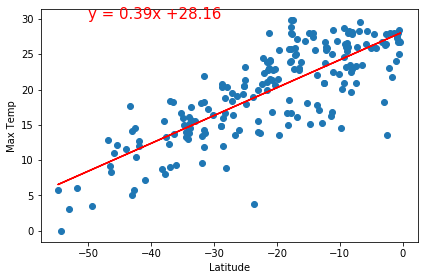

In [21]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp",-50,30)
plt.savefig("output_data/linreg_sh_lat_temp.png")
plt.tight_layout()
plt.plot

**Discussion about the linear relationship:** In the Northern Hemisphere, an R-value 0.65 indicates a strong linear relationship between latitude and maximum temperature, while in the Southern Hemisphere, an R-value of 0.63 also suggests a strong linear relationship between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.014214616823270562


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

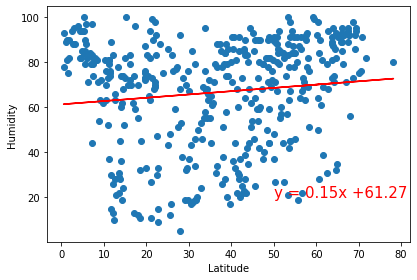

In [22]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",50,20)
plt.savefig("output_data/linreg_nh_lat_hum.png")
plt.tight_layout()
plt.plot

The r-value is: 0.0017437984693728446


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

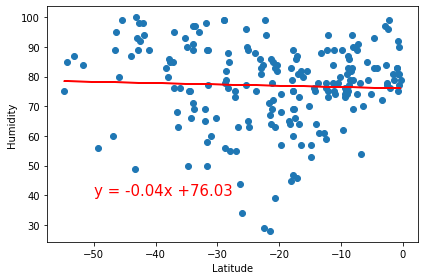

In [23]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",-50,40)
plt.savefig("output_data/linreg_sh_lat_hum.png")
plt.tight_layout()
plt.plot

**Discussion about the linear relationship:** Considering both hemispheres, the R-values of 0.01 and 0.001 indicate a moderate linear relationship between latitude and humidity. Nevertheless, it is essential to recall that correlation alone does not establish causation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009833936307510746


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

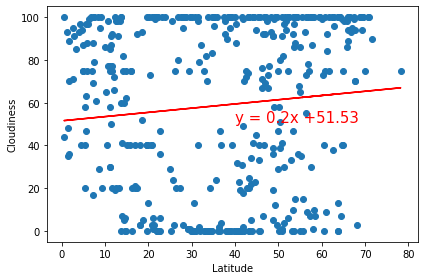

In [25]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",40,51)
plt.savefig("output_data/linreg_nh_lat_cld.png")
plt.tight_layout()
plt.plot

The r-value is: 0.001417542034022371


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

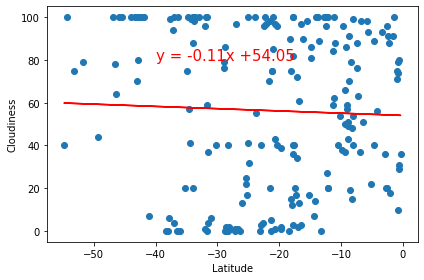

In [26]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",-40,80)
plt.savefig("output_data/linreg_sh_lat_cld.png")
plt.tight_layout()
plt.plot

**Discussion about the linear relationship:** Regarding both hemispheres, the R-values of 0.009 and 0.001 indicate that the linear relationship between latitude and precipitation is practically non-existent. Nonetheless, it is important to keep in mind that correlation does not imply causation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003116392510084197


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

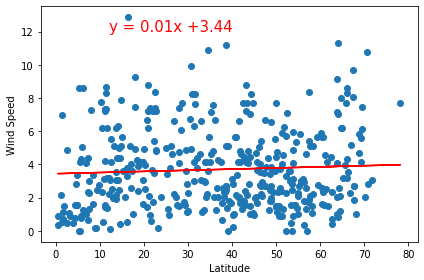

In [27]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",12,12)
plt.savefig("output_data/linreg_nh_lat_wsp.png")
plt.tight_layout()
plt.plot

The r-value is: 0.0008058242695209914


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

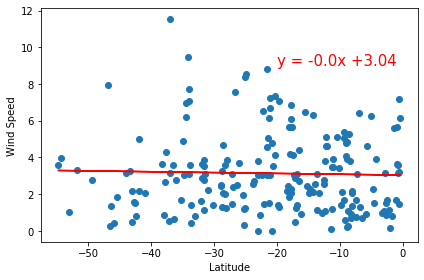

In [28]:
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",-20,9)
plt.savefig("output_data/linreg_sh_lat_wsp.png")
plt.tight_layout()
plt.plot

**Discussion about the linear relationship:** When considering both hemispheres, the R-values of 0.003 and 0.0008 suggest a weak or non-existent linear relationship between latitude and wind speed. However, it is crucial to keep in mind that correlation does not necessarily imply causation.